In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import incision_detection_mmdet
import numpy as np
import torch

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


2023-12-27 12:16:30,250 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - mmdet.version=2.25.0
2023-12-27 12:16:30,251 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - 11.7
2023-12-27 12:16:30,251 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - GCC 9.4
2023-12-27 12:16:30.253 | DEBUG    | pigleg_cv:<module>:50 - DEVICE=None


1.12.0a0+8a1a93a True


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device


'cuda:0'

In [4]:
!nvidia-smi

Wed Dec 27 12:16:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   41C    P8     9W / 250W |   2729MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [6]:
Path("/home/appuser/.cache/torch/hub/checkpoints/").exists()

True

In [7]:
# !ls /root/.cache/torch/hub/checkpoints/
!ls /home/appuser/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


# Run incision crop

In [8]:
# find the video
i = -5
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*knopf*.mp4"))
print(len(img_pths))
img_pths[i]

77


PosixPath('../piglegsurgeryweb/media/upload/20230222-130058_Einzelknopfnaht_075e5ae66dbce61ad576a8c90d2623b76e2ea990/Einzelknopfnaht.mp4')

2023-12-27 12:16:32.027 | DEBUG    | run_perpendicular:get_frame_to_process:174 - 3415
2023-12-27 12:16:32.317 | DEBUG    | run_perpendicular:get_frame_to_process:185 - Last frame capture error, frame
2023-12-27 12:16:32.439 | DEBUG    | run_perpendicular:get_frame_to_process:185 - Last frame capture error, frame
2023-12-27 12:16:32.562 | DEBUG    | run_perpendicular:get_frame_to_process:185 - Last frame capture error, frame
2023-12-27 12:16:32.686 | DEBUG    | run_perpendicular:get_frame_to_process:185 - Last frame capture error, frame
2023-12-27 12:16:32.808 | DEBUG    | run_perpendicular:get_frame_to_process:185 - Last frame capture error, frame


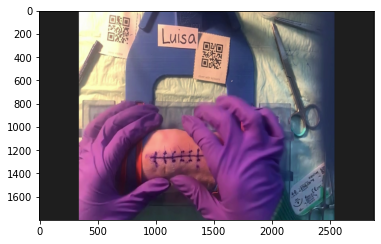

In [9]:
# get the frame
img = pigleg_cv.get_frame_to_process(img_pths[i])
# opencv has inverted color channels
plt.imshow(img[:,:,::-1])


2023-12-27 12:16:33,711 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-12-27 12:16:33,719 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(1800, 2880, 3), max(img)=255


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-12-27 12:16:37,033 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1


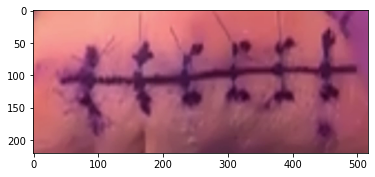

In [10]:
# find the incision
imgs, bboxes = incision_detection_mmdet.run_incision_detection(img, "./delete/")
plt.imshow(imgs[0][:,:,::-1])

In [11]:
# pip install mmcv-full

# Run whole image processing

In [14]:
# find the video
i = 51
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*.jpg"))
print(len(img_pths))
print(img_pths[i])
pgcv = pigleg_cv.DoComputerVision(str(img_pths[i]),  "./del_test_image_output/", device=device)
pgcv.run_image_processing()

2023-12-27 12:24:38.107 | DEBUG    | pigleg_cv:__init__:97 - ###############
2023-12-27 12:24:38.108 | DEBUG    | pigleg_cv:__init__:98 - device=cuda:0
2023-12-27 12:24:38.109 | DEBUG    | pigleg_cv:__init__:99 - test_first_seconds=False
2023-12-27 12:24:38.109 | DEBUG    | pigleg_cv:__init__:100 - is_microsurgery=False
2023-12-27 12:24:38.110 | DEBUG    | pigleg_cv:__init__:123 - self.is_microsurgery=False
2023-12-27 12:24:38.111 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:372 - device=cuda:0


429
../piglegsurgeryweb/media/upload/20211012-194853_2021.10.12-A-Fritzsch.Sarah-Einzelknopfnaht_a4e4d1e180ca413333a42856707de055c47085ab/preview.jpg


ValueError: too many values to unpack (expected 2)

In [15]:
pgcv.is_video

False

In [ ]:
plt.imshow(pgcv.frame[...,::-1])

In [ ]:
pgcv.meta

# Run whole video processing

In [42]:
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/test*.mp4"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

2023-12-07 21:44:23.088 | INFO     | pigleg_cv:run:82 - CV processing started on ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=del_test_video_output_test
2023-12-07 21:44:23.089 | DEBUG    | pigleg_cv:run_video_processing:136 - Running video processing...
2023-12-07 21:44:23.097 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 185
2023-12-07 21:44:23.229 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:212 - device=cpu
2023-12-07 21:44:27.162 | DEBUG    | run_qr:get_bboxes:37 - [[          0           0      787.24      510.12     0.12095]]
2023-12-07 21:44:27.732 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [0.0,
                     2.3127758502960205,
                     923.2431640625,
                     536.6835327148438,
                     0.389884352684021],
 'box': [],
 'incision_bboxes': [],
 'is_detected': False,
 'pix_size': 1.0

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-07 21:44:32,195 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-07 21:44:32.197 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:223 - {'bbox_scene_area': [0.0,
                     2.3127758502960205,
                     923.2431640625,
                     536.6835327148438,
                     0.389884352684021],
 'box': [],
 'incision_bboxes': [],
 'incision_bboxes_old': [[283.20086669921875,
                          304.21234130859375,
                          493.01824951171875,
                          359.9990539550781,
                          0.9942836165428162]],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 4.308236993976474e-05,
 'qr_bboxes_SFD': [],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.0003125,
 'text': None}
2023-12-07 21:44:32.199 | DEBUG

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-07 21:44:43,827 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-12-07 21:44:43.829 | DEBUG    | run_perpendicular:main_perpendicular:294 - len(imgs)=1
2023-12-07 21:44:43.894 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output_test/perpendicular_0.json'
2023-12-07 21:44:43.903 | DEBUG    | tools:save_json:26 - updated keys: ['intersections', 'alphas']


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


2023-12-07 21:44:47.330 | DEBUG    | tools:save_json:15 - Writing 'del_test_video_output_test/stitch_detection_0.json'
2023-12-07 21:44:47.340 | DEBUG    | tools:save_json:26 - updated keys: ['stitch_labels', 'stitch_bboxes']
2023-12-07 21:44:47,341 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - number of detected stitches = 5
2023-12-07 21:44:47,342 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - Stitch detection finished, boxes in: del_test_video_output_test/stitch_detection_0.json
2023-12-07 21:44:47,429 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared upper line: 0.144
2023-12-07 21:44:47,431 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared lower line: 0.076
2023-12-07 21:44:47.598 | DEBUG    | pigleg_cv:run_image_processing:123 - Perpendicular finished.
2023-12-07 21:44:47.599 | DEBUG    | pigleg_cv:run_video_processing:152 - Single frame processing on cropped mediafile finis

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-12-07 21:44:52,316 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-12-07 21:44:52,358 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-12-07 21:44:52,366 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-07 21:44:52,366 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-12-07 21:44:52,708 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth


2023-12-07 21:44:53.920 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 0 by tracker


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2023-12-07 21:54:17.015 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 50 by tracker
2023-12-07 22:03:46.301 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 100 by tracker
2023-12-07 22:13:11.118 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:54 - Processing frame 150 by tracker
2023-12-07 22:19:30.198 | DEBUG    | pigleg_cv:run_video_processing:186 - Tracker finished in 2082.5966527462006s.
2023-12-07 22:19:30.200 | DEBUG    | pigleg_cv:run_video_processing:189 - filename=del_test_video_output_test/__cropped.mp4, outputdir=del_test_video_output_test
2023-12-07 22:19:30.203 | DEBUG    | pigleg_cv:run_video_processing:190 - filename=True, outputdir=True
2023-12-07 22:19:30.210 | DEBUG    | run_report:main_report:673 - size_input_video: [720, 404], size_output_video: [1303, 420], size_output_img: [748, 420], resize_factor: 1.0396039603960396
2023-12-07 22:19:30.215 | DEBUG    | run_report:main_report:692 - Sort d

6551.445362914586
b Needle holder
r Forceps
g Scissors
m None


2023-12-07 22:19:31.246 | DEBUG    | run_report:main_report:757 - Frame 10 processed!
2023-12-07 22:19:32.102 | DEBUG    | run_report:main_report:757 - Frame 20 processed!
2023-12-07 22:19:32.938 | DEBUG    | run_report:main_report:757 - Frame 30 processed!
2023-12-07 22:19:33.793 | DEBUG    | run_report:main_report:757 - Frame 40 processed!
2023-12-07 22:19:34.626 | DEBUG    | run_report:main_report:757 - Frame 50 processed!
2023-12-07 22:19:35.431 | DEBUG    | run_report:main_report:757 - Frame 60 processed!
2023-12-07 22:19:36.271 | DEBUG    | run_report:main_report:757 - Frame 70 processed!
2023-12-07 22:19:37.129 | DEBUG    | run_report:main_report:757 - Frame 80 processed!
2023-12-07 22:19:37.966 | DEBUG    | run_report:main_report:757 - Frame 90 processed!
2023-12-07 22:19:38.803 | DEBUG    | run_report:main_report:757 - Frame 100 processed!
2023-12-07 22:19:39.665 | DEBUG    | run_report:main_report:757 - Frame 110 processed!
2023-12-07 22:19:40.502 | DEBUG    | run_report:main

bbox
[211.9981231689453, 169.8654022216797, 369.18328857421875, 327.0505676269531, 0.9951696991920471]


2023-12-07 22:19:48.442 | DEBUG    | run_report:create_pdf_report:297 - main_report: figures del_test_video_output_test/graph_1c_trajectory.jpg is saved
2023-12-07 22:19:48.603 | DEBUG    | run_report:create_pdf_report:326 - main_report: figures del_test_video_output_test/fig_1a_forceps_graph.jpg is saved
2023-12-07 22:19:48.609 | DEBUG    | run_report:create_heatmap_report_plt:167 - points.shape=(1, 2)
/webapps/piglegsurgery/piglegcv/run_report.py:193: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
2023-12-07 22:19:48.944 | DEBUG    | run_report:create_pdf_report:297 - main_re

main_report: Video file del_test_video_output_test/__cropped.mp4 is processed!


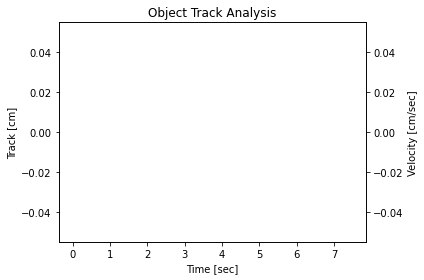

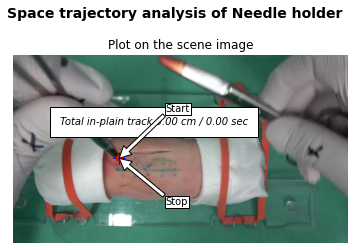

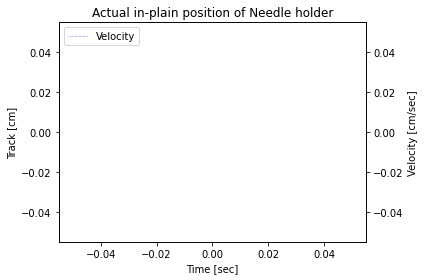

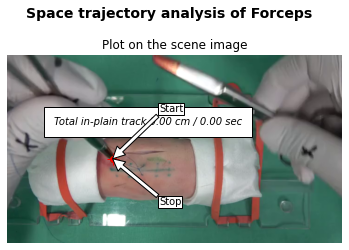

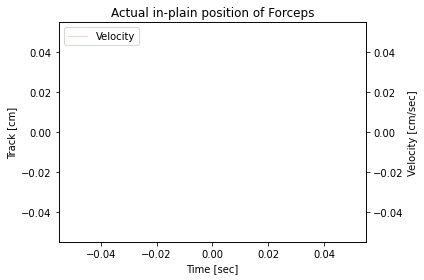

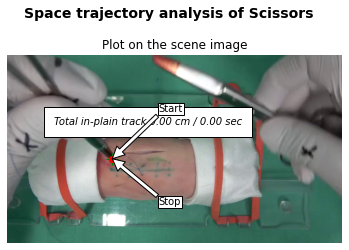

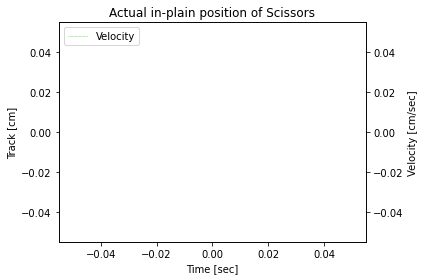

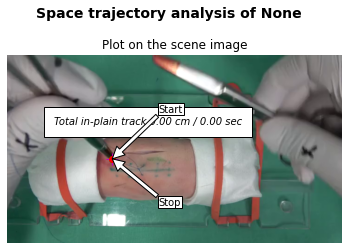

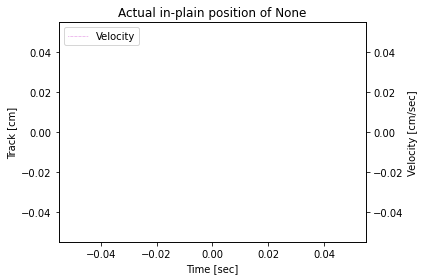

In [43]:
pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output_test/", meta=None)

## Run just `main_report()`

You can repeat to do the main report afer the `do_computer_vision()` is done firsttime

In [29]:

# pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)
pigleg_cv.main_report(str(img_pths[0]),  "./del_test_video_output/")

TypeError: main_report() missing 1 required positional argument: 'meta'

In [16]:
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

In [17]:
!python /home/appuser/mmdetection/mmdet/utils/collect_env.py

fatal: detected dubious ownership in repository at '/webapps/piglegsurgery'
To add an exception for this directory, call:

	git config --global --add safe.directory /webapps/piglegsurgery
sys.platform: linux
Python: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) [GCC 10.3.0]
CUDA available: True
GPU 0: NVIDIA GeForce GTX 1080 Ti
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.64
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 1.12.0a0+8a1a93a
PyTorch compiling details: PyTorch built with:
  - GCC 9.4
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash N/A)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_52,code=sm_52;-gencode;arch=compute_60,cod

In [ ]:
!pwd

In [ ]:
pip list

In [35]:
# !MMCV_WITH_OPS=1 FORCE_CUDA=1 pip install mmcv-full==1.5.2

In [36]:
# !pip uninstall -y mmcv-full